In [29]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import models
from keras import layers
from sklearn import preprocessing 
import json
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
#from audioFeatures import bothDF
import ast



In [30]:
df_train = pd.read_pickle("./transformed_2.csv")
df_train.shape

(3816, 2)

In [49]:
X = np.vstack(df_train["transformed"])
y = df_train.type

print(y)

0       distorted electric guitar
1       distorted electric guitar
2       distorted electric guitar
3       distorted electric guitar
4       distorted electric guitar
                  ...            
3811                       violin
3812                       violin
3813                       violin
3814                       violin
3815                       violin
Name: type, Length: 3816, dtype: object


In [34]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(df_train.type)
print(label_encoded)


[1 1 1 ... 7 7 7]


In [35]:
label_encoded = label_encoded[:, np.newaxis]
print(label_encoded)

[[1]
 [1]
 [1]
 ...
 [7]
 [7]
 [7]]


In [36]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)
print(one_hot_encoded)


[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [37]:
X = np.vstack(df_train.transformed)
y = one_hot_encoded


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [39]:
number_classes = 8
inshape = (X_train.shape[1],)


model = models.Sequential()  #creates the neural network layers:

model.add(layers.Dense(512, activation='relu', input_shape=inshape))
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(number_classes, activation='softmax'))
model.compile(optimizer='Nadam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(X_train,
        y_train,
        epochs=50,
        batch_size=20,
        validation_data=(X_test, y_test))

results = model.evaluate(X_test, y_test)
print("\n")
print("Resultados: ",results)
print("\n")


Epoch 1/50
153/153 [==============================] - 96s 629ms/step - loss: 0.6096 - accuracy: 0.8159 - val_loss: 0.4477 - val_accuracy: 0.8770
Epoch 2/50
153/153 [==============================] - 100s 656ms/step - loss: 0.2291 - accuracy: 0.9269 - val_loss: 0.2669 - val_accuracy: 0.9215
Epoch 3/50
153/153 [==============================] - 99s 645ms/step - loss: 0.1332 - accuracy: 0.9600 - val_loss: 0.6685 - val_accuracy: 0.8678
Epoch 4/50
153/153 [==============================] - 100s 651ms/step - loss: 0.1102 - accuracy: 0.9676 - val_loss: 0.1695 - val_accuracy: 0.9490
Epoch 5/50
153/153 [==============================] - 98s 641ms/step - loss: 0.0881 - accuracy: 0.9751 - val_loss: 0.1689 - val_accuracy: 0.9490
Epoch 6/50
153/153 [==============================] - 101s 662ms/step - loss: 0.0692 - accuracy: 0.9751 - val_loss: 0.6944 - val_accuracy: 0.8927
Epoch 7/50
153/153 [==============================] - 98s 643ms/step - loss: 0.0928 - accuracy: 0.9699 - val_loss: 0.0749 - val

In [48]:
name="models/0.9829-accuracy-200000-50epochs-loss0.0823"


model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)
model.save(name+'.h5')

loss: 0.016883237287402153
val_loss: 0.08235479891300201


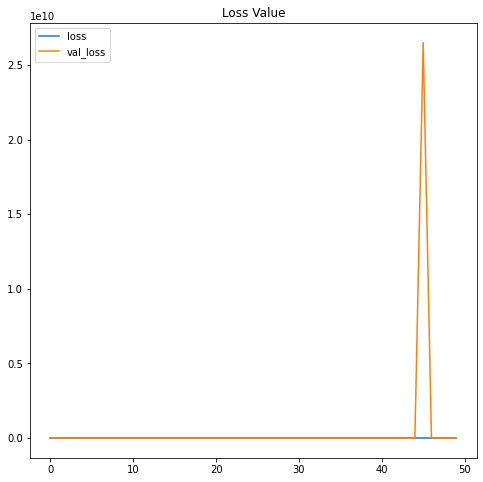

In [40]:
# Displaying loss values

plt.figure(figsize=(8,8))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('loss:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()

accuracy: 0.9957404732704163
val_accuracy: 0.9829843044281006


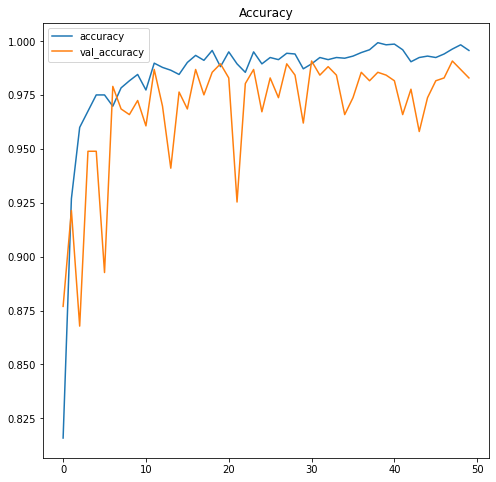

In [41]:
# Displaying accuracy scores
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
print('accuracy:', history.history['accuracy'][-1])
print('val_accuracy:', history.history['val_accuracy'][-1])
plt.show()


In [42]:
#Model evaluation

predictions = model.predict(X_test)
predictions

array([[4.4657397e-03, 3.0150295e-07, 9.8609030e-01, ..., 4.3469743e-05,
        9.3892375e-03, 1.4711088e-07],
       [2.8823417e-08, 5.9393349e-15, 7.3561190e-16, ..., 1.6267455e-12,
        7.0050221e-10, 2.1455713e-13],
       [5.2197569e-04, 7.6990062e-04, 6.8358507e-04, ..., 9.7578182e-04,
        9.9426103e-01, 6.5678387e-04],
       ...,
       [1.9548870e-05, 1.6156150e-07, 1.9037277e-08, ..., 3.9562647e-06,
        7.0658311e-06, 3.1330958e-07],
       [1.1185095e-04, 5.6286594e-06, 9.9852055e-01, ..., 7.7987315e-06,
        5.4536235e-07, 9.9548203e-08],
       [6.4092041e-05, 1.6978742e-03, 3.2585165e-03, ..., 2.9202132e-05,
        1.6705621e-05, 2.1785474e-05]], dtype=float32)

In [43]:
'''The code below shows how to take the argmax of all predictions on X_test and 
then followed by decoding y_test into the same form as the predictions variable 
(because previously we already converted y_test into one-hot representation, now we need to convert 
 that back to label-encoded form). This is extremely necessary to do because we want to compare each of 
the element of predictions and y_test.'''

predictions = np.argmax(predictions, axis=1)
y_test = one_hot_encoder.inverse_transform(y_test)


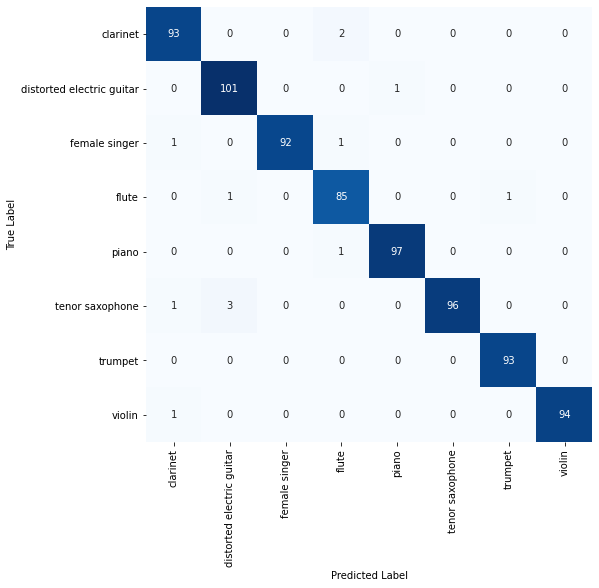

In [44]:
# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()